# Setup

## Bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

rc = {"font.family": "serif",  # fonte serifada
      "mathtext.fontset": "cm",  # texto matemático em LaTeX
      "font.size": 14,  # Usar tamanho 12 ou 14
      "axes.axisbelow": True,  # grid abaixo dos dados
      "axes.grid": True, # grid por padrão
      
      "text.usetex": True, # latex em toda a figura
      }

%matplotlib inline

plt.rcParams.update(rc)


## Funções

In [3]:
def regressao_polinomial(x, y, deg=1, return_all=False):
    """
    - Retorna: 
      coeficientes, polinomio, regressão | regressao
    """
    coeficientes = np.polyfit(x, y, deg=deg)
    polinomio = np.poly1d(coeficientes)
    regressao = polinomio(x)
    return [coeficientes, polinomio, regressao] if return_all else regressao


def add_c_grid(ax, a1=0.5, a2=0.5):
    ax.minorticks_on()
    ax.grid(which='major', alpha=a1)
    ax.grid(which='minor', alpha=a2)


def add_sci_limits(ax, which='both', limits=(0, 0)):
    ax.ticklabel_format(
        axis=which,
        style='sci',
        useMathText=True,
        scilimits=limits)

def save_tab(tab, file, idx=True, header=True):
    tab.to_latex(
    buf=file,
    bold_rows=True,
    escape=False,
    index=idx,
    encoding='utf-8',
    header=header,
    column_format=len(tab.columns)*'c')

In [4]:
def reg_lin_manual(x, y, retorna_incerteza=False) -> list:
    '''
    Calcula os coeficientes da regressão linear calculada manualmente de x e y.

    # Retorna

    ## retorna_incerteza = False
     * [A, B, reg]

    ## retorna_incerteza = True
    * [A, B, reg, sigma_a, sigma_b]

    # Descrição do retorno:
    * A : Coeficiente linear
    * B: Coeficiente angular
    * reg: vetor de regeressão
    * sigma_a: incerteza de A
    * sigma_b: incerteza de B
    '''

    B = ((np.sum(x) * np.sum(y)) - (x.size * np.sum(x*y))) / \
        (np.sum(x)**2 - (x.size * np.sum(x**2)))

    A = (np.sum(y) - B * np.sum(x)) / (x.size)

    pol = np.poly1d([B, A])
    reg = pol(x)

    if retorna_incerteza:
        S = np.sum(np.power(y - reg, 2))
        den = (x.size * np.sum(x**2)) - (np.sum(x))**2

        sigma_a = S / ((x.size - 2) * np.sqrt(den))
        sigma_b = (S / (x.size - 2)) * np.sqrt(np.sum(x**2)/den)
        return [A, B, reg, sigma_a, sigma_b]

    return [A, B, reg]


In [13]:
df = pd.DataFrame({
    'm': range(10, 110, 10)
})

df['d1'] = [4.6, 8.6, 12.1, 15.8, 19.8, 23.9, 27.0, 30.0, 33.9, 37.6]
df['d2'] = [4.8, 7.8, 11.1, 14.3, 17.4, 20.1, 23.0, 26.0, 28.5, 32.5]
df['d3'] = [4.9, 9.3, 12.9, 16.0, 19.0, 22.0, 25.0, 28.1, 31.2, 34.7]

df['dm'] = (df['d1'] + df['d2'] + df['d3'])/3

df

,m,d1,d2,d3,dm
0,10,4.6,4.8,4.9,4.766667
1,20,8.6,7.8,9.3,8.566667
2,30,12.1,11.1,12.9,12.033333
3,40,15.8,14.3,16.0,15.366667
4,50,19.8,17.4,19.0,18.733333
5,60,23.9,20.1,22.0,22.000000
6,70,27.0,23.0,25.0,25.000000
7,80,30.0,26.0,28.1,28.033333
8,90,33.9,28.5,31.2,31.200000
9,100,37.6,32.5,34.7,34.933333


In [14]:
A, B, reg, sigma_a, sigma_b = reg_lin_manual(
    x=df['m'], y=df['dm'], retorna_incerteza=True)

A, B, reg, sigma_a*1e4, sigma_b*1e2

(1.9933333333333423,
 0.32854545454545436,
 array([ 5.27878788,  8.56424242, 11.84969697, 15.13515152, 18.42060606,
        21.70606061, 24.99151515, 28.2769697 , 31.56242424, 34.84787879]),
 3.1850935959409243,
 6.249604921703448)

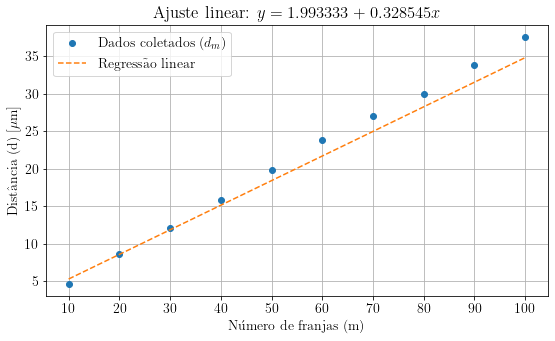

In [15]:
f, ax = plt.subplots(figsize=(9,5))

ax.plot(df['m'], df['d1'], 'o', label='Dados coletados ($d_m$)')
ax.plot(df['m'], reg, '--', label='Regressão linear')

ax.set(
    title=f'Ajuste linear: $y = {A:.6f} + {B:.6f}x$',
    xlabel='Número de franjas (m)',
    ylabel='Distância (d) [$\mu$m]',
    xticks=df['m'].values
)

ax.legend()

f.savefig('./dados-reg.pdf')


plt.show()

In [16]:
tab_1_tex = df.copy()

tab_1_tex.columns = [
    'm', 
    r'$(d_1\pm 0.5) \times 10^{-6}$m',
    r'$(d_2\pm 0.5) \times 10^{-6}$m',
    r'$(d_3\pm 0.5) \times 10^{-6}$m',
    r'$(d_m\pm 0.5) \times 10^{-6}$m',
]

tab_1_tex

,m,$(d_1\pm 0.5) \times 10^{-6}$m,$(d_2\pm 0.5) \times 10^{-6}$m,$(d_3\pm 0.5) \times 10^{-6}$m,$(d_m\pm 0.5) \times 10^{-6}$m
0,10,4.6,4.8,4.9,4.766667
1,20,8.6,7.8,9.3,8.566667
2,30,12.1,11.1,12.9,12.033333
3,40,15.8,14.3,16.0,15.366667
4,50,19.8,17.4,19.0,18.733333
5,60,23.9,20.1,22.0,22.000000
6,70,27.0,23.0,25.0,25.000000
7,80,30.0,26.0,28.1,28.033333
8,90,33.9,28.5,31.2,31.200000
9,100,37.6,32.5,34.7,34.933333


In [17]:
save_tab(tab=tab_1_tex, file='./tab1.tex', idx=False)

/tmp/ipykernel_9185/1545488325.py:26: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab.to_latex(


In [18]:
lambda_exp = 2*B
lambda_exp

0.6570909090909087

In [19]:
2*sigma_b

0.12499209843406897

In [20]:
eta = abs(632.8 - lambda_exp*1000)/ 632.8
eta*100

3.838639236869284